In [5]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [6]:
import pandas as pd

states = pd.read_csv(path_data+'states.csv', index_col=0)
states.head()

,total,nonhispanic,white,black,aian,asian,pacific,other,multiracial,hispanic,hispanic_white,hispanic_black,hispanic_aian,hispanic_asian,hispanic_pacific,hispanic_other,hispanic_multiracial
Alabama,4779736,4594134,3204402,1244437,25907,52937,1976,4030,60445,185602,70992,6874,2311,658,1081,92880,10806
Alaska,710231,670982,455320,21949,102556,37459,7219,1111,45368,39249,18256,1314,2315,676,190,9991,6507
Arizona,6392017,4496868,3695647,239101,257426,170509,10959,8595,114631,1895149,971474,19907,39103,6186,1689,753121,103669
Arkansas,2915918,2729868,2173469,447102,20183,35647,5509,2121,45837,186050,71760,2793,2065,455,354,97450,11173
California,37253956,23240237,14956253,2163804,162250,4775070,128577,85587,968696,14013719,6497681,135268,200551,85937,15809,6231785,846688


In [7]:
# exercise 01

"""
Aggregate and Calculate Proportions

In this exercise we will explore Hispanic racial identity. Hispanics self-identify as a variety of races. We will use the sum() method to help calculate national percentages of Hispanics identifying as each race.

Census workers are often promulgating information to the public, who are used to seeing proportions as percentages. For this reason, we will use percentages in this exercise and throughout this course.

pandas has been imported as pd. State-level counts from table "P5 - Hispanic or Latino Origin by Race" have been loaded into the DataFrame states.
"""

# Instructions

"""

    Calculate the percentage of Hispanics who identify as White. Use 100 times the sum of values in the hispanic_white column divided by the sum of values in the hispanic column.
---

    Create a list hispanic_races with the names of columns that count Hispanics by race.

    Calculate percentages using 100 times the sum of each race column (Use the list!) divided by the sum of the hispanic column.

"""

# solution

# What percentage of Hispanics identify as White?
print(100 * states['hispanic_white'].sum() / states['hispanic'].sum())

#----------------------------------#

# Set list of Hispanic race column names
hispanic_races = [
    "hispanic_white", 
    "hispanic_black", "hispanic_aian", 
    "hispanic_asian", "hispanic_pacific", 
    "hispanic_other", "hispanic_multiracial"
    ]

# What percentage of Hispanics identify as each race?
print(100 * states[hispanic_races].sum() / states['hispanic'].sum())


#----------------------------------#

# Conclusion

"""
Nice work! Nationally, 55% of Hispanics identify as White and 35% identify as "Some Other Race". Now we will calculate similar percentages for individual states.
"""

54.5246839030109
hispanic_white          54.524684
hispanic_black           3.139062
hispanic_aian            1.300926
hispanic_asian           0.393289
hispanic_pacific         0.108426
hispanic_other          34.693285
hispanic_multiracial     5.840328
dtype: float64


'\nNice work! Nationally, 55% of Hispanics identify as White and 35% identify as "Some Other Race". Now we will calculate similar percentages for individual states.\n'

In [8]:
# exercise 02

"""
Calculate Proportions

Nationally, 55% of Hispanics identify as White and 35% identify as "Some Other Race". (You can run Line 2 in the code window to confirm this.) But there is substantial state-to-state variation, which we will now investigate. As a reminder, we will express proportions as percentages throughout this course.

pandas has been imported, the DataFrame states is loaded with population counts by race and Hispanic origin. A list, hispanic_races, has names of columns with Hispanics by race data, and is shown in the console. 
"""

# Instructions

"""

    Use the copy method to create a deep copy of only the hispanic_races columns in states
    As you iterate the races in the hispanic_races list, calculate the percentage of Hispanics identifying as each race as 100 times the count of the current race divided by the total number of Hispanics.
    Print the head of the resulting DataFrame.

"""

# solution

# What percentage of Hispanics identify as each race?
print(100 * states[hispanic_races].sum() / states["hispanic"].sum())

# Create a deep copy of only the Hispanic race columns
states_hr = states[hispanic_races].copy()

# Calculate percentages for all columns in the date frame
for race in hispanic_races:
    states_hr[race] = 100 * states_hr[race] / states["hispanic"]

# View the result
print(states_hr.head())


#----------------------------------#

# Conclusion

"""
Great job! Let's investigate further.
"""

hispanic_white          54.524684
hispanic_black           3.139062
hispanic_aian            1.300926
hispanic_asian           0.393289
hispanic_pacific         0.108426
hispanic_other          34.693285
hispanic_multiracial     5.840328
dtype: float64
            hispanic_white  hispanic_black  hispanic_aian  hispanic_asian  \
Alabama          38.249588        3.703624       1.245137        0.354522   
Alaska           46.513287        3.347856       5.898239        1.722337   
Arizona          51.261088        1.050419       2.063321        0.326412   
Arkansas         38.570277        1.501209       1.109917        0.244558   
California       46.366571        0.965254       1.431105        0.613235   

            hispanic_pacific  hispanic_other  hispanic_multiracial  
Alabama             0.582429       50.042564              5.822136  
Alaska              0.484089       25.455426             16.578766  
Arizona             0.089122       39.739408              5.470230  
Arkansas

"\nGreat job! Let's investigate further.\n"

In [9]:
import warnings

# Suppress all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


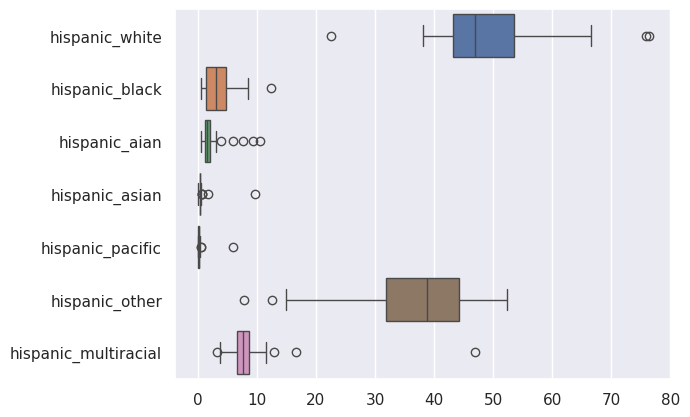

hispanic_white          76.339680
hispanic_black           3.521989
hispanic_aian            0.572777
hispanic_asian           0.227402
hispanic_pacific         0.060633
hispanic_other          14.978955
hispanic_multiracial     4.298564
Name: Florida, dtype: float64
hispanic_white          75.862495
hispanic_black          12.385538
hispanic_aian            0.528948
hispanic_asian           0.105762
hispanic_pacific         0.007944
hispanic_other           7.831978
hispanic_multiracial     3.277334
Name: Puerto Rico, dtype: float64
hispanic_white          22.555072
hispanic_black           1.257841
hispanic_aian            1.109714
hispanic_asian           9.751576
hispanic_pacific         5.958193
hispanic_other          12.493173
hispanic_multiracial    46.874431
Name: Hawaii, dtype: float64


'\nVery interesting! Note that Hawaii is also (unsurprisingly) the state the largest percentage of Hispanics identifying as Pacific Islander.\n'

In [10]:
# exercise 03

"""
Identify Extreme Values

Now that you have created a DataFrame with the percentage of Hispanic racial self-identification by state, you will explore it further, beginning by creating a boxplot using seaborn.

You will also find the states with the largest or smallest percentage of Hispanics identifying as particular races. To do so, you will apply the squeeze() method. This method converts a single-row DataFrame to a series (with no effect on a DataFrame with more than one row).

pandas has been imported. The DataFrame states_hr is loaded, which has percentages of racial self-identification for 7 different race categories.
"""

# Instructions

"""

    Create a boxplot by setting the data parameter to the name of the DataFrame. (orient = "h" will plot the boxplots horizontally.)
    Using squeeze, show the state with the largest value in column hispanic_white.
    Using squeeze, show the state with the smallest value in column hispanic_other.
    Notice that very few Hispanics identify as Asian, but one state is a high outlier. Using squeeze, show the state with the largest value in column hispanic_asian.

"""

# solution

# Import seaborn and matplotlib.plt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Create a boxplot
sns.boxplot(data = states_hr, orient = "h")
plt.show()

# Show states with extreme values in various columns
print(states_hr.nlargest(1, 'hispanic_white').squeeze())
print(states_hr.nsmallest(1, 'hispanic_other').squeeze())
print(states_hr.nlargest(1, 'hispanic_asian').squeeze())

#----------------------------------#

# Conclusion

"""
Very interesting! Note that Hawaii is also (unsurprisingly) the state the largest percentage of Hispanics identifying as Pacific Islander.
"""

In [11]:
import requests

In [12]:
# exercise 04

"""
The Basic API Request

In this exercise, you will construct an API request to retrieve the average family size and median age for all states in the United States. The data will come from Summary File 1 of the 2010 Decennial Census.

requests has been imported for you.
"""

# Instructions

"""


    Specify appropriate string values for year and dataset to retrieve data for 2010 from Summary File 1 of the Decennial Census

    Construct get_vars, the list of Census variables to request, with the following variable names: "NAME", "P013001" (median age), "P037001" (average family size)

    Output r.text using the print function


"""

# solution

# Build base URL
HOST = "https://api.census.gov/data"
year = '2010'
dataset = 'dec/sf1'
base_url = "/".join([HOST, year, dataset])

# Specify Census variables and other predicates
get_vars = ['NAME','P013001','P037001']
predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "state:*"

# Execute the request, examine text of response object
r = requests.get(base_url, params=predicates)
print(r.text)

#----------------------------------#

# Conclusion

"""
Fantastic! One important note: executing actual API requests could provide a poor learning experience if there are connection problems or if you accidentally perform a very large request. Instead, in this course you'll be writing code that looks exactly like the code you'd write locally, but that in the background it mimicks a request and returns the corresponding response object (if you set up the code right). If you're curious about how this works, check out this GitHub repo.
(https://github.com/adrian-datacamp/mock-request)
"""

[["NAME","P013001","P037001","state"],
["Alabama","37.9","3.02","01"],
["Alaska","33.8","3.21","02"],
["Arizona","35.9","3.19","04"],
["Arkansas","37.4","3.00","05"],
["California","35.2","3.45","06"],
["Louisiana","35.8","3.10","22"],
["Kentucky","38.1","2.98","21"],
["Colorado","36.1","3.08","08"],
["Connecticut","40.0","3.08","09"],
["Delaware","38.8","3.06","10"],
["District of Columbia","33.8","3.01","11"],
["Florida","40.7","3.01","12"],
["Georgia","35.3","3.17","13"],
["Hawaii","38.6","3.42","15"],
["Idaho","34.6","3.16","16"],
["Illinois","36.6","3.20","17"],
["Indiana","37.0","3.05","18"],
["Iowa","38.1","2.97","19"],
["Kansas","36.0","3.06","20"],
["Maine","42.7","2.83","23"],
["Maryland","38.0","3.15","24"],
["Massachusetts","39.1","3.08","25"],
["Michigan","38.9","3.05","26"],
["Minnesota","37.4","3.05","27"],
["Mississippi","36.0","3.11","28"],
["Missouri","37.9","3.00","29"],
["Montana","39.8","2.91","30"],
["Nebraska","36.2","3.04","31"],
["Nevada","36.3","3.20","32"],
[

"\nFantastic! One important note: executing actual API requests could provide a poor learning experience if there are connection problems or if you accidentally perform a very large request. Instead, in this course you'll be writing code that looks exactly like the code you'd write locally, but that in the background it mimicks a request and returns the corresponding response object (if you set up the code right). If you're curious about how this works, check out this GitHub repo.\n(https://github.com/adrian-datacamp/mock-request)\n"

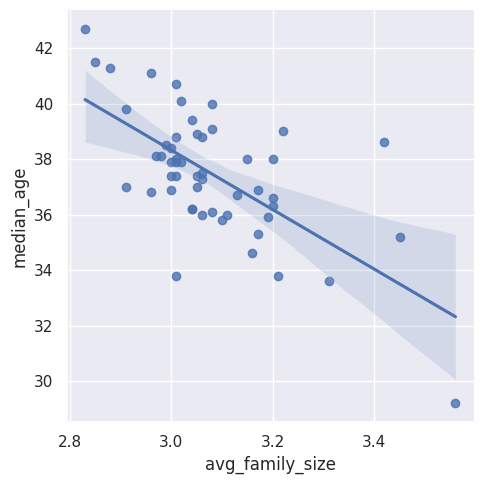

'\nGreat work! Notice that larger average family size means more children per adult, and is correlated with lower median age.\n'

In [13]:
# exercise 05

"""
The API Response and Pandas

In this exercise you will load data from an API response object into a pandas DataFrame. You will assign user-friendly column names and convert the values from strings to appropriate data types.

After creating the DataFrame, run the sample code to create a scatterplot to visualize the relationship between average family size and median age in the United States.

requests and pandas (as pd) have already been imported. A response object r is loaded.
"""

# Instructions

"""


    Build a list col_names of 4 new column names: name, median_age, avg_family_size, and state

    Use the DataFrame constructor to create the DataFrame states. The data parameter should be set to r.json(), but use slicing to skip the first item, which contains the old column names

    Use the astype method on each column to assign the correct data type.

"""

# solution

# Import seaborn
import seaborn as sns
sns.set()

# Construct the DataFrame
col_names = ['name','median_age','avg_family_size','state']
states = pd.DataFrame(columns = col_names, data = r.json()[1:])

# Convert each column with numeric data to an appropriate type
states["median_age"] = states["median_age"].astype(float)
states["avg_family_size"] = states["avg_family_size"].astype(float)

# Scatterplot with regression line
sns.lmplot(x = "avg_family_size", y = "median_age", data = states)
plt.show()

#----------------------------------#

# Conclusion

"""
Great work! Notice that larger average family size means more children per adult, and is correlated with lower median age.
"""

In [14]:
base_url = 'https://api.census.gov/data/2010/dec/sf1'

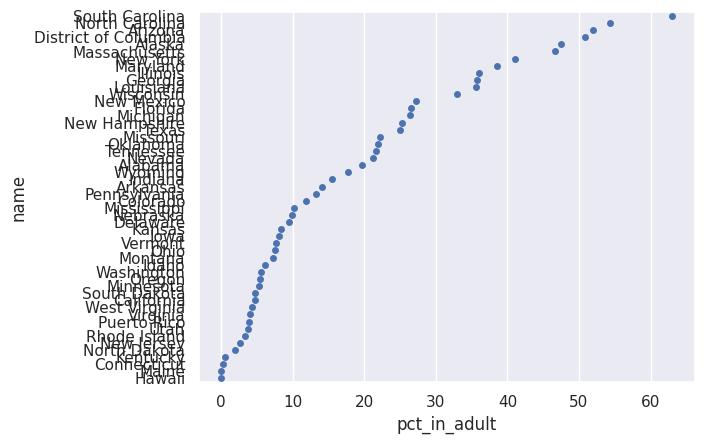

'\nGood job! Notice that Southern states top the chart, while some states are at or near 0%.\n'

In [15]:
# exercise 06

"""
API to Visualization: Group Quarters

In this exercise, you will investigate where juvenile offenders are incarcerated. This exercise introduces the concept of "group quarters" populations, which includes college dorms, correctional facilities, nursing homes, military bases, etc.

You will visualize the percentage, by state, of incarcerated minor males in adult correctional facilities. The variables to request are:

    PCT021005 - Male: Under 18 years: Institutionalized population: Correctional facilities for adults
    PCT021015 - Male: Under 18 years: Institutionalized population: Juvenile facilities: Correctional facilities intended for juveniles

requests has been imported. The base_url for the API request has been defined.

pandas and seaborn have been imported using the usual aliases.
"""

# Instructions

"""

    Complete the list get_vars with the two desired variables
    Use astype to convert the columns in_adult and in_juvenile to integer
    Calculate the percentage of minors in correctional facilities for adults: the numerator should be 100 times the number of minors in_adult correctional facilities; the denominator should be the sum of minors in_adult and in_juvenile correctional facilities
    Sort states by pct_in_adult in descending order, using inplace = True

"""

# solution

# Specify variables and execute API request
get_vars = ["NAME", 'PCT021005', 'PCT021015']
predicates["get"] = ",".join(get_vars)
r = requests.get(base_url, params=predicates)

# Construct DataFrame
col_names = ["name", "in_adult", "in_juvenile", "state"]
states = pd.DataFrame(columns=col_names, data=r.json()[1:])
states[["in_adult", "in_juvenile"]] = states[["in_adult", "in_juvenile"]].astype(int)

# Calculate percentage of incarcerated male minors in adult facilities
states["pct_in_adult"] = (100 * states['in_adult'])/(states['in_juvenile'] + states['in_adult'])
states.sort_values(by = 'pct_in_adult', ascending = False, inplace = True)
sns.stripplot(x = "pct_in_adult", y = "name", data = states)
plt.show()

#----------------------------------#

# Conclusion

"""
Good job! Notice that Southern states top the chart, while some states are at or near 0%.
"""

In [16]:
# exercise 07

"""
Specific Places

In this exercise you will practice looking up geographic identifiers for major cities. The Census classifies cities and other municipalities as "places". You will find place codes using the Geographic Codes Lookup at the Missouri Census Data Center
(https://mcdc.missouri.edu/applications/geocodes/)
The variables to request are place names and total population.

The requests library has been imported and the base_url for the request is already set to request SF1 data for 2010.
"""

# Instructions

"""

    Using the Missouri Census Data Center, find (1) the two digit state code for Pennsylvania and (2) the five digit place codes for the cities of Philadelphia and Pittsburgh
    Set the "for" predicate to request the two place codes you found for Philadelphia and Pittsburgh, separated by a comma
    Set the "in" predicate to request the state code you found for Pennsylvania

"""

# solution

# Build dictionary of predicates
get_vars = ["NAME", "P001001"] # <- total population
predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "place:60000,61000"
predicates["in"] = "state:42"

# Execute the request
r = requests.get(base_url, params=predicates)

# Show the response text
print(r.text)

#----------------------------------#

# Conclusion

"""
Great! This powerful tool will allow you to find data for many locations in the United States.
"""

[["NAME","P001001","state","place"],
["Philadelphia city, Pennsylvania","1526006","42","60000"],
["Pittsburgh city, Pennsylvania","305704","42","61000"]]


'\nGreat! This powerful tool will allow you to find data for many locations in the United States.\n'

In [21]:
# exercise 08

"""
Congressional Districts by State

A Pennsylvania-based family advocacy nonprofit wants to find the average family size by Congressional district, so that they can call representatives from districts with relatively large families. For this exercise you will have to know the GEOID (ANSI Code) for Pennsylvania. If you don't remember it from a previous exercise, use the Geographic Codes Lookup at the Missouri Census Data Center.
(https://mcdc.missouri.edu/applications/geocodes/)
The requests and pandas (as pd) packages have been imported. The base_url is defined, as is the predicates dictionary with the list of variables to request.
"""

# Instructions

"""

    Set the "for" key in the predicates dict to return all Congressional districts. Spell out congressional district in full.
    Set the "in" key in the predicates dict to only return geographies in the state of Pennsylvania.
---

    Check the values (print the head) of the avg_family_size column of the cd DataFrame.
---

    Based on the values you saw in the avg_family_size column, set it to an appropriate data type.

"""

# solution

# Build dictionary of predicates and execute the request
predicates["for"] = "congressional district:*"
predicates["in"] = "state:42"
r = requests.get(base_url, params=predicates)

# Construct the DataFrame
col_names = ["name", "avg_family_size", "state", "cd"]
cd = pd.DataFrame(columns=col_names, data=r.json()[1:])

# Print the head of the "avg_family_size" column
print(cd["avg_family_size"].head())

# Set data type and print
cd["avg_family_size"] = cd["avg_family_size"].astype(float)
print(cd)

#----------------------------------#

# Conclusion

"""
Good work! Now that the data type is appropriate for this column's values, the DataFrame is now ready for analysis.
"""

0    655146
1    630277
2    640356
3    647418
4    651762
Name: avg_family_size, dtype: object
                                                 name  avg_family_size state  \
0   Congressional District 1 (111th Congress), Pen...         655146.0    42   
1   Congressional District 2 (111th Congress), Pen...         630277.0    42   
2   Congressional District 3 (111th Congress), Pen...         640356.0    42   
3   Congressional District 4 (111th Congress), Pen...         647418.0    42   
4   Congressional District 5 (111th Congress), Pen...         651762.0    42   
5   Congressional District 8 (111th Congress), Pen...         672685.0    42   
6   Congressional District 6 (111th Congress), Pen...         726465.0    42   
7   Congressional District 7 (111th Congress), Pen...         673623.0    42   
8   Congressional District 11 (111th Congress), Pe...         687860.0    42   
9   Congressional District 9 (111th Congress), Pen...         666810.0    42   
10  Congressional Distr

"\nGood work! Now that the data type is appropriate for this column's values, the DataFrame is now ready for analysis.\n"

In [22]:
# exercise 09

"""
Zip Code Tabulation Areas

In the marketing field, it is very common to want to know ZIP Code demographics. ZIP Code Tabulation Areas ("ZCTAs") are Census-defined equivalents to ZIP Codes that are built out of Census blocks. In this exercise you will request total population for all ZCTAs in the state of Alabama.

In pandas, an index can be used to retrieve particular rows. The GEOIDs are suitable row identifiers. In this exercise you will set a multilevel index based on the state and ZCTA of each row.

The requests and pandas packages have been imported. The base_url is defined, as is the predicates dictionary with the list of variables to request.
"""

# Instructions

"""

    Set the "for" key in the predicates dict to return all ZCTAs; spell out the geography in full as "zip code tabulation area (or part)""
    Set the "in" key in the predicates dict to only return ZCTAs in the state of Alabama; you will have to look up the FIPS code for Alabama in one of the online sources you have learned about
    Set the DataFrame index to be the concatenation of the state and zcta columns. Use inplace = True to not create a new DataFrame.

"""

# solution

# Build dictionary of predicates and execute the request
predicates = {}
predicates["get"] = ",".join(["NAME",  "P001001"])
predicates["for"] = "zip code tabulation area (or part):*"
predicates["in"] = "state:01"
r = requests.get(base_url, params=predicates)

# Construct the DataFrame
col_names = ["name", "total_pop", "state", "zcta"]
zctas = pd.DataFrame(columns=col_names, data=r.json()[1:])
zctas["total_pop"] = zctas["total_pop"].astype(int)

# Set multilevel index from GEOIDs and print the head
zctas.set_index(['state', 'zcta'], inplace = True)
print(zctas.head())

#----------------------------------#

# Conclusion

"""
Good work! Notice that some of the ZCTAs are labelled "part". It is common in rural areas for ZIP Codes to overlap state borders.
"""

                                    name  total_pop
state zcta                                         
01    30165  ZCTA5 30165 (part), Alabama         70
      31905  ZCTA5 31905 (part), Alabama          9
      35004         ZCTA5 35004, Alabama      10427
      35005         ZCTA5 35005, Alabama       7942
      35006         ZCTA5 35006, Alabama       3121


'\nGood work! Notice that some of the ZCTAs are labelled "part". It is common in rural areas for ZIP Codes to overlap state borders.\n'